Importing necessary packages 

In [1]:
import pandas as pd 
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input
import os 
import glob 
from PIL import Image

Reading the sample csv-files from the directory. Sorting by id. 

In [2]:
train_sample = pd.read_csv("data/train/train_sample")
test_sample = pd.read_csv("data/test/test_sample")
validate_sample = pd.read_csv("data/validate/validate_sample")

train_sample = train_sample.sort_values(by="id")
test_sample = test_sample.sort_values(by="id")
validate_sample = validate_sample.sort_values(by="id")

Changing name from 6_way_label to 5_way_label, as there now are only 5 different labels. 

In [3]:
train_sample = train_sample.rename(columns={"6_way_label": "5_way_label"})
test_sample = test_sample.rename(columns={"6_way_label": "5_way_label"})
validate_sample = validate_sample.rename(columns={"6_way_label": "5_way_label"})

Changing all labels that are 5 to 4, to later be able to convert the integer labels to categorical labels. Have to keep in mind that all labels equal to 4 actually are label 5 classes.  

Converting to 4 for all labels that equal 5. 

Getting files from image directory for train, test and validate. Extracting all files from every sub-folder, which is the image's label. Converting to pandas series. Using glob with "*.jpg" as suffix, since all images are stored with jpg-extension. 

In [4]:
train_sample["5_way_label"] = train_sample["5_way_label"].apply(lambda x: 4 if x==5 else x)
test_sample["5_way_label"] = test_sample["5_way_label"].apply(lambda x: 4 if x==5 else x)
validate_sample["5_way_label"] = validate_sample["5_way_label"].apply(lambda x: 4 if x==5 else x)

In [5]:
files_train = pd.Series(glob.glob("data/train/images/*/*.jpg"))
files_test = pd.Series(glob.glob("data/test/images/*/*.jpg"))
files_validate = pd.Series(glob.glob("data/validate/images/*/*.jpg"))

Function to get the id, which is the part before the jpg-suffix. 

In [6]:
def get_id(file):
    return file.split("\\")[-1].split(".")[0]

Applying function for all files, and storing them as id. 

In [7]:
img_id_train = files_train.apply(get_id)
img_id_test = files_test.apply(get_id)
img_id_validate = files_validate.apply(get_id)

Constructing dataframe with id and corresponding image-file. Also sorting by id, to match the sample-dataframes. 

In [8]:
img_df_train = pd.DataFrame({"id": img_id_train, "files": files_train})
img_df_test = pd.DataFrame({"id": img_id_test, "files": files_test})
img_df_validate = pd.DataFrame({"id": img_id_validate, "files": files_validate})

In [9]:
img_df_train = img_df_train.sort_values(by="id")
img_df_test = img_df_test.sort_values(by="id")
img_df_validate = img_df_validate.sort_values(by="id")

In [10]:
img_df_train

,id,files
32881,100pp1,data/train/images\5\100pp1.jpg
0,101453,data/train/images\0\101453.jpg
22997,1016df,data/train/images\2\1016df.jpg
32882,1018ps,data/train/images\5\1018ps.jpg
1,102h5n,data/train/images\0\102h5n.jpg
...,...,...
34979,zym0z,data/train/images\5\zym0z.jpg
20372,zyqjr,data/train/images\0\zyqjr.jpg
20373,zz8mo,data/train/images\0\zz8mo.jpg
31965,zz8qs,data/train/images\2\zz8qs.jpg


In [11]:
train_sample

,Unnamed: 0,clean_title,id,image_url,5_way_label
35936,163210,perfect execution modern us air force poster,100pp1,https://external-preview.redd.it/cBy5xWF292XdF...,4
3920,269742,bill murray and a potted plant,101453,https://external-preview.redd.it/gPMI9k0_d0gDX...,0
3437,552081,oh the things he has seen,1016df,https://external-preview.redd.it/adC8wXKw5Qqeu...,2
3124,519080,confidence methodically continuing his amputat...,1018ps,https://external-preview.redd.it/fY4bLZ-aBt3QW...,4
16923,35192,retiring boss gives employees for each year th...,102h5n,https://external-preview.redd.it/0qHYWFvuxLzjk...,0
...,...,...,...,...,...
27954,85496,thule seminar neonazi life is a battle or stru...,zym0z,https://external-preview.redd.it/Az6fQC3G1PmYU...,4
1200,90855,houston man pays ticket fine to police with bi...,zyqjr,https://external-preview.redd.it/cFsJT8YuwyToi...,0
8621,229083,neil degrasse tyson,zz8mo,https://external-preview.redd.it/Smaa0yfey3RHH...,0
11390,472944,soon your bananas will be mine,zz8qs,https://external-preview.redd.it/BR9grts3tbV_d...,2


As we can see above, the dataframes both match in lenght and row-positions after sorting both by id. 

Resetting index, to later concatenate the dataframes together. 

In [12]:
img_df_train = img_df_train.reset_index(drop=True)
img_df_test = img_df_test.reset_index(drop=True)
img_df_validate = img_df_validate.reset_index(drop=True)

train_sample= train_sample.reset_index(drop=True)
test_sample = test_sample.reset_index(drop=True)
validate_sample = validate_sample.reset_index(drop=True)

In [13]:
img_df_train

,id,files
0,100pp1,data/train/images\5\100pp1.jpg
1,101453,data/train/images\0\101453.jpg
2,1016df,data/train/images\2\1016df.jpg
3,1018ps,data/train/images\5\1018ps.jpg
4,102h5n,data/train/images\0\102h5n.jpg
...,...,...
34975,zym0z,data/train/images\5\zym0z.jpg
34976,zyqjr,data/train/images\0\zyqjr.jpg
34977,zz8mo,data/train/images\0\zz8mo.jpg
34978,zz8qs,data/train/images\2\zz8qs.jpg


In [14]:
train_sample

,Unnamed: 0,clean_title,id,image_url,5_way_label
0,163210,perfect execution modern us air force poster,100pp1,https://external-preview.redd.it/cBy5xWF292XdF...,4
1,269742,bill murray and a potted plant,101453,https://external-preview.redd.it/gPMI9k0_d0gDX...,0
2,552081,oh the things he has seen,1016df,https://external-preview.redd.it/adC8wXKw5Qqeu...,2
3,519080,confidence methodically continuing his amputat...,1018ps,https://external-preview.redd.it/fY4bLZ-aBt3QW...,4
4,35192,retiring boss gives employees for each year th...,102h5n,https://external-preview.redd.it/0qHYWFvuxLzjk...,0
...,...,...,...,...,...
36649,85496,thule seminar neonazi life is a battle or stru...,zym0z,https://external-preview.redd.it/Az6fQC3G1PmYU...,4
36650,90855,houston man pays ticket fine to police with bi...,zyqjr,https://external-preview.redd.it/cFsJT8YuwyToi...,0
36651,229083,neil degrasse tyson,zz8mo,https://external-preview.redd.it/Smaa0yfey3RHH...,0
36652,472944,soon your bananas will be mine,zz8qs,https://external-preview.redd.it/BR9grts3tbV_d...,2


As seen above, the indices now match along with sorted ids.

Dropping "Unnamed: 0"-column from sample-dataframes.

In [15]:
train_sample = train_sample.drop("Unnamed: 0", axis=1)
test_sample = test_sample.drop("Unnamed: 0", axis=1)
validate_sample = validate_sample.drop("Unnamed: 0", axis=1)

Making function to get format of image-file and evaluate if image-file is indeed an image. Will try to open image and return format of image is possible. If not possible, the file is not an image or the file doesn't exist anymore, as it's already removed, and None will be returned as format. 

In [16]:
def get_format(file):
    try:
        return Image.open(file).format
    except:
        return None    

Applying it to every file in image-id-dataframe. 

In [17]:
format_train = img_df_train["files"].apply(get_format)
format_test = img_df_test["files"].apply(get_format)
format_validate = img_df_validate["files"].apply(get_format)

In [18]:
format_train.unique(), format_test.unique(), format_validate.unique()

(array(['JPEG', 'PNG'], dtype=object),
 array(['JPEG'], dtype=object),
 array(['JPEG', 'PNG'], dtype=object))

As seen above, all unique image-formats are only JPEG and PNG. The non-image-formats are marked None. Meaning if it's a JPEG or PNG it is allowed as image-format in Tensorflow preprocessing. A boolean array with this as a condition is made. 

In [19]:
is_image_train = np.array((format_train == "JPEG") | (format_train == "PNG"))
is_image_test = np.array((format_test == "JPEG") | (format_test == "PNG"))
is_image_validate = np.array((format_validate == "JPEG") | (format_validate == "PNG"))

Dataframe with files and the samples are merged together. If this is not the first run of the notebook, the non-image-files are already removed from folder, hence the shape of the two dataframes are not the same, and the sample-dataframe contains ids that are not in the files-dataframe. That's why they are merged on id, which is sorted for both, with a inner join, where all ids that are in the sample-dataframe and not in the files-dataframe are automatically removed. 

In [20]:
train_sample_img = train_sample.merge(img_df_train, how="inner", on="id")
test_sample_img = test_sample.merge(img_df_test, how="inner", on="id")
validate_sample_img = validate_sample.merge(img_df_validate, how="inner", on="id")

In [21]:
train_sample_img

,clean_title,id,image_url,5_way_label,files
0,perfect execution modern us air force poster,100pp1,https://external-preview.redd.it/cBy5xWF292XdF...,4,data/train/images\5\100pp1.jpg
1,bill murray and a potted plant,101453,https://external-preview.redd.it/gPMI9k0_d0gDX...,0,data/train/images\0\101453.jpg
2,oh the things he has seen,1016df,https://external-preview.redd.it/adC8wXKw5Qqeu...,2,data/train/images\2\1016df.jpg
3,confidence methodically continuing his amputat...,1018ps,https://external-preview.redd.it/fY4bLZ-aBt3QW...,4,data/train/images\5\1018ps.jpg
4,retiring boss gives employees for each year th...,102h5n,https://external-preview.redd.it/0qHYWFvuxLzjk...,0,data/train/images\0\102h5n.jpg
...,...,...,...,...,...
34975,thule seminar neonazi life is a battle or stru...,zym0z,https://external-preview.redd.it/Az6fQC3G1PmYU...,4,data/train/images\5\zym0z.jpg
34976,houston man pays ticket fine to police with bi...,zyqjr,https://external-preview.redd.it/cFsJT8YuwyToi...,0,data/train/images\0\zyqjr.jpg
34977,neil degrasse tyson,zz8mo,https://external-preview.redd.it/Smaa0yfey3RHH...,0,data/train/images\0\zz8mo.jpg
34978,soon your bananas will be mine,zz8qs,https://external-preview.redd.it/BR9grts3tbV_d...,2,data/train/images\2\zz8qs.jpg


Merged dataframe above. 

Finding all files that are not images using boolean masking with the array that tells if file is image. 

In [22]:
not_img_train = train_sample_img["files"][~is_image_train]
not_img_test = test_sample_img["files"][~is_image_test]
not_img_validate = validate_sample_img["files"][~is_image_validate]

Making function for deleting filepath if it exists. 

In [23]:
def delete_img_in_folder(file):

    if os.path.exists(file):

        os.remove(file)      

Removing all the files that are not images. If it's not the first run, no images will then be removed. 

In [24]:
not_img_train.apply(delete_img_in_folder)
not_img_test.apply(delete_img_in_folder)
not_img_validate.apply(delete_img_in_folder)

Series([], Name: files, dtype: object)

Only keeping the rows that images, using boolean masking. 

In [25]:
train_sample_clean = train_sample_img[is_image_train]
test_sample_clean = test_sample_img[is_image_test]
validate_sample_clean = validate_sample_img[is_image_validate]

In [26]:
train_sample_clean.shape, test_sample_clean.shape, validate_sample_clean.shape, train_sample.shape, test_sample.shape, validate_sample.shape

((34980, 5), (3710, 5), (7334, 5), (36654, 4), (3884, 4), (7670, 4))

As seen above, around 5% of the rows are removed from the input dataframes, as they are not images. 

Final distribution of each class for all datasets after cleaning is finished: 

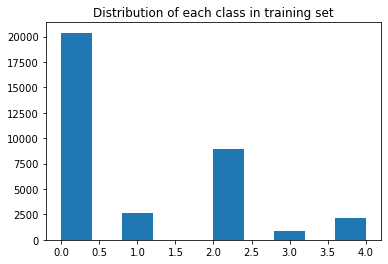

In [27]:
plt.hist(train_sample_clean["5_way_label"])
plt.title("Distribution of each class in training set")
plt.show()

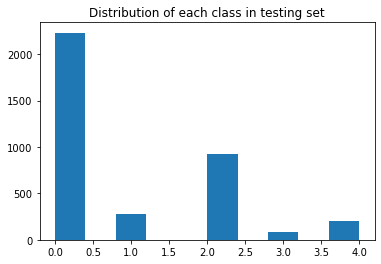

In [28]:
plt.hist(test_sample_clean["5_way_label"])
plt.title("Distribution of each class in testing set")
plt.show()

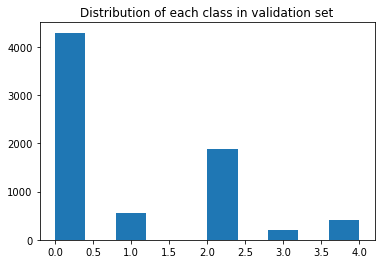

In [29]:
plt.hist(validate_sample_clean["5_way_label"])
plt.title("Distribution of each class in validation set")
plt.show()

Getting distribution number for each class, along with percentage of total data. 

In [54]:
def get_class_occurence(df):
    occurence = []
    percentage = []
    for i in range(len(df["5_way_label"].unique())):
        occurence.append((df["5_way_label"] == i).sum())
        percentage.append((df["5_way_label"] == i).sum()/len(df))
    return np.array(occurence), np.array(percentage)*100

In [55]:
occ_train, per_train = get_class_occurence(train_sample_clean)
occ_train, per_train

(array([20375,  2622,  8969,   915,  2099], dtype=int64),
 array([58.24757004,  7.49571184, 25.64036592,  2.61578045,  6.00057176]))

In [56]:
occ_validate, per_validate = get_class_occurence(validate_sample_clean)
occ_validate, per_validate

(array([4295,  546, 1876,  206,  411], dtype=int64),
 array([58.56285792,  7.44477775, 25.57949277,  2.80883556,  5.604036  ]))

In [57]:
occ_test, per_test = get_class_occurence(test_sample_clean)
occ_test, per_test

(array([2232,  273,  923,   82,  200], dtype=int64),
 array([60.16172507,  7.35849057, 24.8787062 ,  2.21024259,  5.39083558]))

As seen above training, validation -and testing set are all equally distributed. They all have very high occurence of class 0 samples, medium occurence of class 2, low occurence of classes 1, 3 -and 5, and no occurence of class 4 at all, which is now removed and all classes that are now labeled as 4, are actually class 5. Because all rows containing this class got removed during the step where all rows that had no domain were removed. 

Writing clean sample-csv-file to same directory as input-file 

In [30]:
train_sample_clean.to_csv("data/train/train_sample_clean")
test_sample_clean.to_csv("data/test/test_sample_clean")
validate_sample_clean.to_csv("data/validate/validate_sample_clean")

Importing images from folders using preprocessing from tensorflow keras. It automatically finds the labels, as they are individual folders. It resizes every image to (256,256) by default. 

In [31]:
img_data_train = tf.keras.preprocessing.image_dataset_from_directory("data/train/images", label_mode="categorical", batch_size=16)
img_data_test = tf.keras.preprocessing.image_dataset_from_directory("data/test/images", label_mode="categorical", batch_size=16)
img_data_validate = tf.keras.preprocessing.image_dataset_from_directory("data/validate/images", label_mode="categorical", batch_size=16)

Found 34980 files belonging to 5 classes.
Found 3710 files belonging to 5 classes.
Found 7334 files belonging to 5 classes.


Checking the labels, that they are actually shuffled and categorical. Iterating over dataset and picking next batch, which should be random. 

In [32]:
img_data_train.as_numpy_iterator().next()[1]

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

Rescaling images to range from 0 to 1, instead of from 0 to 255. 

In [33]:
img_data_train = img_data_train.map(lambda x,y: (x/255, y))
img_data_test = img_data_test.map(lambda x,y: (x/255,y))
img_data_validate = img_data_test.map(lambda x,y: (x/255,y))

Checking that mapping made 0 as minimum and 1 as maximum. 

In [34]:
img_data_train.as_numpy_iterator().next()[0].min(), img_data_train.as_numpy_iterator().next()[0].max()

(0.0, 1.0)

Constructing the model, which is sequential. 3 convolutional layer, with a maxpooling layer each, before two dense layers, where last dense layer is output layer, containing a categorical label with length 5. 

In [35]:
model = Sequential()

model.add(Input(shape=(256,256,3)))
model.add(Conv2D(16,(3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation="relu"))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(5, activation="softmax"))

model.compile("Adam", loss=tf.losses.categorical_crossentropy, metrics=[tf.keras.metrics.CategoricalAccuracy()])

Model summary

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       921,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 931,701 (3.55 MB)

 Trainable params: 931,701 (3.55 MB)

 Non-trainable params: 0 (0.00 B)

Saving plot of model as png-file. 

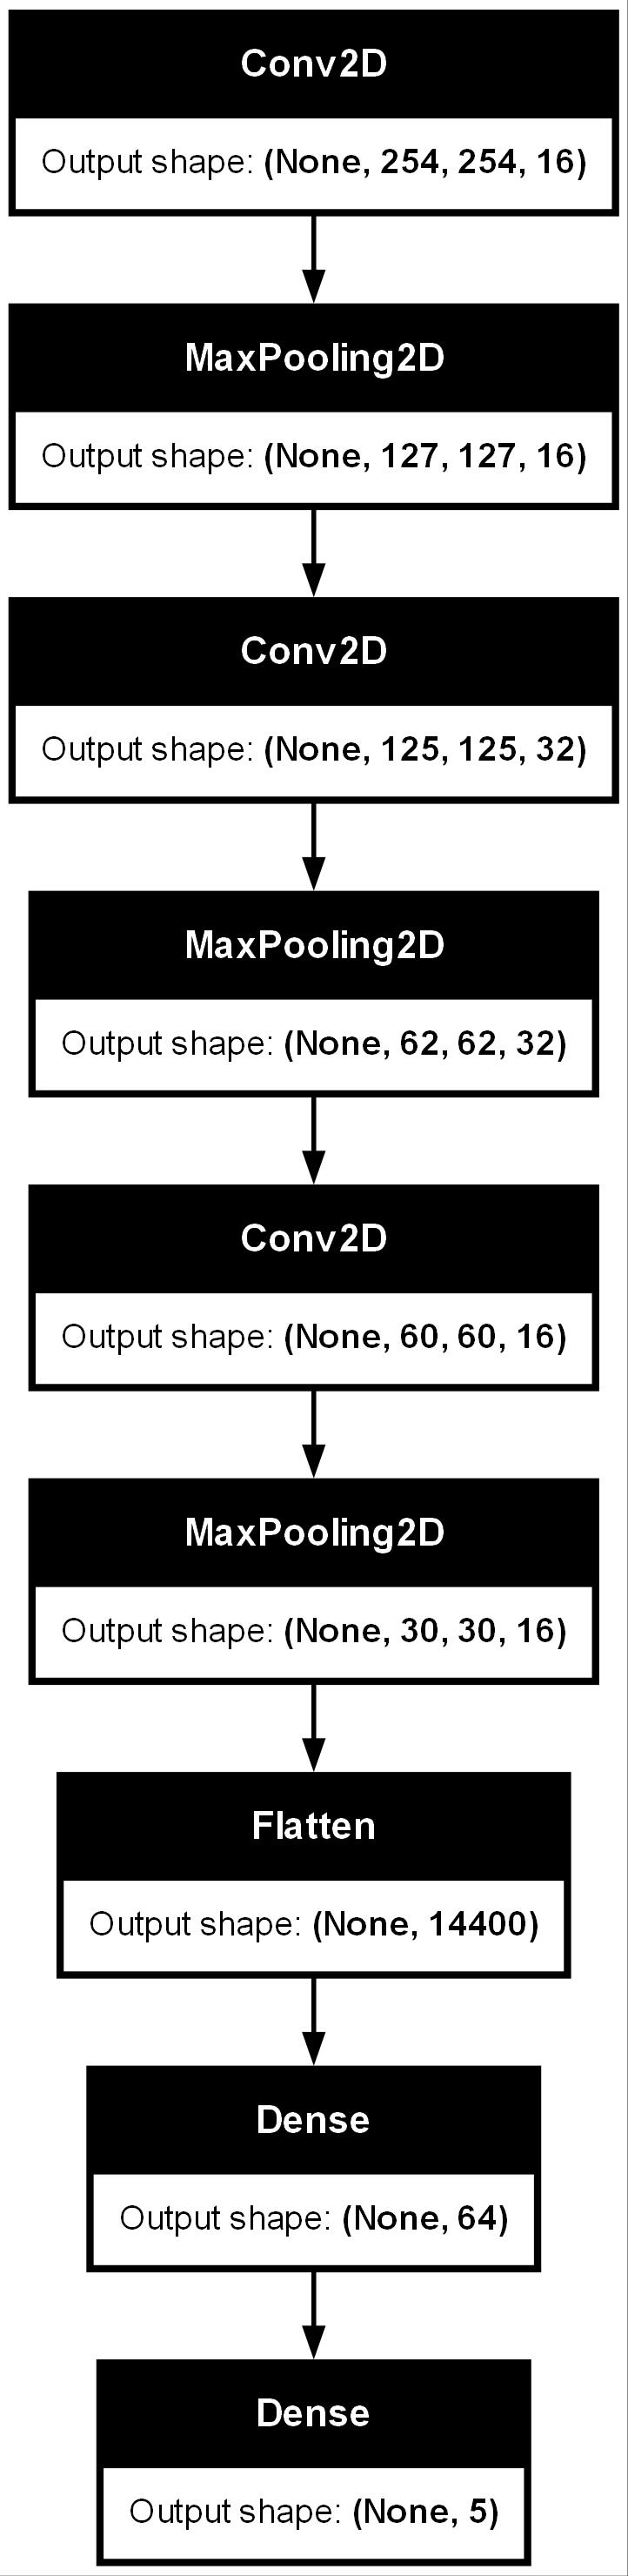

In [37]:
os.environ["PATH"] += os.pathsep + 'C:/Programfiler/Graphviz/bin/'
tf.keras.utils.plot_model(model, to_file="model_image.jpg", show_shapes=True)

In [38]:
history = model.fit(img_data_train, epochs=1, validation_data=img_data_validate)

2187/2187 ━━━━━━━━━━━━━━━━━━━━ 388s 177ms/step - categorical_accuracy: 0.5810 - loss: 1.1298 - val_categorical_accuracy: 0.6016 - val_loss: 1.2612


Predicting labels on testing set, getting confusion matrix -and F1-score. 

In [39]:
y_actual = []
y_predicted = []
for batch in img_data_test.as_numpy_iterator():
    X, y = batch
    y_pred = model.predict(X)
    y_actual.extend(y)
    y_predicted.extend(y_pred)

y_actual = np.argmax(np.array(y_actual), axis=-1)
y_predicted = np.argmax(np.array(y_predicted), axis=-1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━

In [40]:
confusion_mat = tf.math.confusion_matrix(y_actual, y_predicted)
confusion_mat = np.array(confusion_mat)
confusion_mat

array([[2190,    5,   18,    0,   19],
       [ 224,   12,   14,    4,   19],
       [ 854,    4,   38,    2,   25],
       [  71,    3,    4,    1,    3],
       [ 138,    5,   12,    0,   45]])

In [44]:
def get_accuracy(confusion_matrix):
    return confusion_matrix.trace()/confusion_matrix.sum()

In [47]:
accuracy = get_accuracy(confusion_mat)
accuracy

0.6161725067385445

In [59]:
def get_F1_score(confusion_matrix):
    recall = []
    precision = []

    for i in range(len(confusion_matrix)):
        recall.append(confusion_matrix[i,i]/confusion_matrix[i,:].sum())
        precision.append(confusion_matrix[i,i]/confusion_matrix[:,i].sum())

    recall = np.array(recall)
    precision = np.array(precision)

    return recall, precision, (2*recall*precision)/(recall+precision)

In [60]:
recall, precision, F1_score = get_F1_score(confusion_mat)
recall, precision, F1_score

(array([0.9811828 , 0.04395604, 0.0411701 , 0.01219512, 0.225     ]),
 array([0.62985332, 0.4137931 , 0.44186047, 0.14285714, 0.40540541]),
 array([0.76720967, 0.0794702 , 0.0753221 , 0.02247191, 0.28938907]))